In [4]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

#Install yolo v8

In [6]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output
!yolo mode=checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 915, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'predict', 'benchmark', 'train', 'export', 'val', 'track'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS


#connect data for training (frame 1)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("lameess").project("referee-signals")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to referee-signals-1 in yolov8:: 100%|██████████| 4204/4204 [00:01<00:00, 3662.45it/s]


#train yolov8

In [8]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/referee-signals-1/data.yaml epochs=30 imgsz=640 patience=5 batch=8 split=train

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/referee-signals-1/data.yaml, epochs=30, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=train, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

#save folders

In [11]:
import shutil
from google.colab import files

# Replace 'folder_name' with your actual folder name
shutil.make_archive('testing medium augmentent batch 8 frame 1', 'zip', '/content/runs/detect/val2')
files.download('testing medium augmentent batch 8 frame 1.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Train mAP

In [ ]:
!yolo detect val model=/content/best.pt data=/content/referee-signals-1/data.yaml split=train

#iou val

In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics.utils.metrics import box_iou
import torch

def calculate_iou_ultralytics(pred_boxes, gt_boxes):
    pred_boxes = torch.tensor(pred_boxes, dtype=torch.float32)
    gt_boxes = torch.tensor(gt_boxes, dtype=torch.float32)

    # Calculate IoU matrix
    iou_matrix = box_iou(pred_boxes, gt_boxes)
    return iou_matrix

def evaluate_single_image_iou(model, image_path, gt_boxes, conf_thres, show=True):
    """
    Calculate IoU for a single image with ground truth boxes

    Args:
        model: YOLO model
        image_path: Path to image
        gt_boxes: List of ground truth boxes in xyxy format [x1, y1, x2, y2, class_id]
        conf_thres: Confidence threshold for detections
        show: Whether to show the visualization

    Returns:
        ious: List of IoU values for matched predictions
        pred_boxes: List of predicted boxes
    """
    # Run prediction
    results = model(image_path, conf=conf_thres)

    # Extract prediction boxes
    pred_boxes_xyxy = []
    pred_boxes_data = []

    for r in results:
      boxes = r.boxes
      for box in boxes.data:
          b = box[:4].cpu().numpy()
          conf = float(box[4])
          cls = int(box[5])

          pred_boxes_xyxy.append(b)
          pred_boxes_data.append({
              'box': b,
              'conf': conf,
              'cls': cls
          })


    # Extract ground truth boxes (only coordinates)
    gt_boxes_xyxy = [box[:4] for box in gt_boxes]
    gt_classes = [int(box[4]) for box in gt_boxes]

    # Calculate IoU matrix
    if pred_boxes_xyxy and gt_boxes_xyxy:
        iou_matrix = calculate_iou_ultralytics(
            np.array(pred_boxes_xyxy),
            np.array(gt_boxes_xyxy)
        ).cpu().numpy()
    else:
        iou_matrix = np.array([])

    # Match predictions to ground truth and get IoUs
    matches = []
    if len(iou_matrix) > 0:
        for gt_idx, gt_class in enumerate(gt_classes):
            best_iou = 0.0
            best_pred_idx = -1

            for pred_idx, pred_data in enumerate(pred_boxes_data):
                # Check if classes match
                if int(pred_data['cls']) == gt_class:
                    iou = iou_matrix[pred_idx, gt_idx]
                    if iou > best_iou:
                        best_iou = iou
                        best_pred_idx = pred_idx

            if best_pred_idx >= 0:
                matches.append({
                    'gt_idx': gt_idx,
                    'pred_idx': best_pred_idx,
                    'iou': best_iou,
                    'gt_class': gt_class,
                    'pred_class': int(pred_boxes_data[best_pred_idx]['cls']),
                    'confidence': pred_boxes_data[best_pred_idx]['conf']
                })

    # Visualize
    if show and len(results) > 0:
        fig, ax = plt.subplots(1, figsize=(10, 10))

        # Show image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)

        # Draw ground truth boxes in green
        for box in gt_boxes:
            x1, y1, x2, y2 = box[:4]
            width = x2 - x1
            height = y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1-5, f"GT: {int(box[4])}", color='g')

        # Draw predicted boxes in red
        for box_data in pred_boxes_data:
            box = box_data['box']
            x1, y1, x2, y2 = box
            width = x2 - x1
            height = y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y2+15, f"Pred: {int(box_data['cls'])}, {box_data['conf']:.2f}", color='r')

        # Draw matches
        for match in matches:
            gt_box = gt_boxes[match['gt_idx']]
            pred_box = pred_boxes_data[match['pred_idx']]['box']

            # Draw line between centers
            gt_center = [(gt_box[0] + gt_box[2])/2, (gt_box[1] + gt_box[3])/2]
            pred_center = [(pred_box[0] + pred_box[2])/2, (pred_box[1] + pred_box[3])/2]

            ax.plot([gt_center[0], pred_center[0]], [gt_center[1], pred_center[1]], 'b-', linewidth=1)
            ax.text((gt_center[0] + pred_center[0])/2, (gt_center[1] + pred_center[1])/2,
                    f"IoU: {match['iou']:.2f}", color='b', backgroundcolor='w')

        ax.set_title(f"IoU Visualization - Matches: {len(matches)}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    return matches, pred_boxes_data

def parse_roboflow_annotations(dataset_path, split="valid"):
    """
    Returns Dictionary mapping image paths to ground truth boxes
    """
    annotations = {}

    # Get paths
    images_dir = os.path.join(dataset_path, split, "images")
    labels_dir = os.path.join(dataset_path, split, "labels")

    # Get class names from data.yaml
    import yaml
    with open(os.path.join(dataset_path, "data.yaml"), 'r') as f:
        data = yaml.safe_load(f)
        class_names = data.get('names', {})

    # Process each image and label
    for img_file in os.listdir(images_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg')):
            continue

        img_path = os.path.join(images_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(labels_dir, label_file)

        # Check if label file exists
        if not os.path.exists(label_path):
            annotations[img_path] = []
            continue

        # Read image dimensions
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_height, img_width = img.shape[:2]

        # Parse label file (YOLO format: class_id, x_center, y_center, width, height)
        boxes = []
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_center = float(parts[1]) * img_width
                    y_center = float(parts[2]) * img_height
                    width = float(parts[3]) * img_width
                    height = float(parts[4]) * img_height

                    # Convert to xyxy format
                    x1 = x_center - width/2
                    y1 = y_center - height/2
                    x2 = x_center + width/2
                    y2 = y_center + height/2

                    boxes.append([x1, y1, x2, y2, class_id])

        annotations[img_path] = boxes

    return annotations, class_names

def calculate_average_iou(model, annotations, conf_thres=0.25, visualize_count=0):
    all_matches = []
    vis_count = 0

    for img_path, gt_boxes in annotations.items():
        if not gt_boxes:  # Skip images without annotations
            continue

        # Decide whether to visualize this image
        show = vis_count < visualize_count
        if show:
            vis_count += 1

        # Calculate IoU for this image
        matches, _ = evaluate_single_image_iou(model, img_path, gt_boxes, conf_thres, show)
        all_matches.extend(matches)

    # Calculate average IoU
    if all_matches:
        avg_iou = sum(m['iou'] for m in all_matches) / len(all_matches)
    else:
        avg_iou = 0.0

    return avg_iou, all_matches

def main_evaluation(model_path, api_key=None, workspace_id=None, project_id=None, version_id=None,
                   dataset_path=None, conf_thres=0.25, visualize_count=5):
    # Load model
    model = YOLO(model_path)

    #dataset_path = '/content/referee-signals-1'

    if not dataset_path:
        raise ValueError("Either dataset_path or Roboflow credentials must be provided")

    # Parse annotations
    annotations, class_names = parse_roboflow_annotations(dataset_path)
    print(f"Loaded {len(annotations)} images with annotations. Class names: {class_names}")

    # Calculate IoU for all images
    avg_iou, all_matches = calculate_average_iou(model, annotations, conf_thres, visualize_count)

    print(f"Average IoU: {avg_iou:.4f} over {len(all_matches)} matched objects")

    # Class-wise IoU
    class_ious = {}
    for match in all_matches:
        cls = match['gt_class']
        if cls not in class_ious:
            class_ious[cls] = []
        class_ious[cls].append(match['iou'])

    print("\nClass-wise IoU:")
    for cls, ious in class_ious.items():
        cls_name = class_names[cls] if cls < len(class_names) else f"Class {cls}"
        avg_cls_iou = sum(ious) / len(ious)
        print(f"  {cls_name}: {avg_cls_iou:.4f} ({len(ious)} objects)")


    # Run Ultralytics built-in validation as well
    print("\nRunning Ultralytics built-in validation:")
    results = model.val(
        data=os.path.join(dataset_path, "data.yaml"),
        conf=conf_thres,
        iou=0.5,
        imgsz=640,
        plots=True,
        save_json=True
    )
    # Return all results
    return {
        'custom_avg_iou': avg_iou,
        'custom_matches': all_matches,
        'class_ious': class_ious,
        'ultralytics_results': results
    }

Loaded 176 images with annotations. Class names: ['Foul', 'Free_Throw_Made', 'Free_Throw_With_Rebound', 'Free_Throw_Without_Rebound', 'Substitutions', 'Three_Point_Shot', 'Two_Free_Throws', 'Two_Points']

image 1/1 /content/referee-signals-1/valid/images/frame23870_jpg.rf.110b25cc3f44370e7c8bf7db24b34767.jpg: 384x640 1 Foul, 26.0ms
Speed: 2.4ms preprocess, 26.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


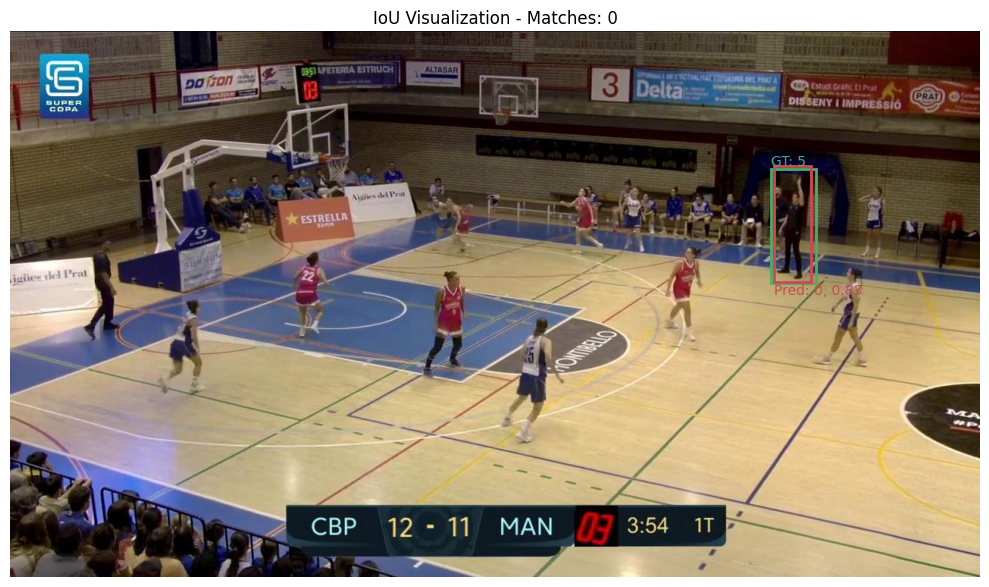


image 1/1 /content/referee-signals-1/valid/images/frame88670_jpg.rf.42dae018df11bce3520e91c79314044e.jpg: 384x640 1 Two_Free_Throws, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


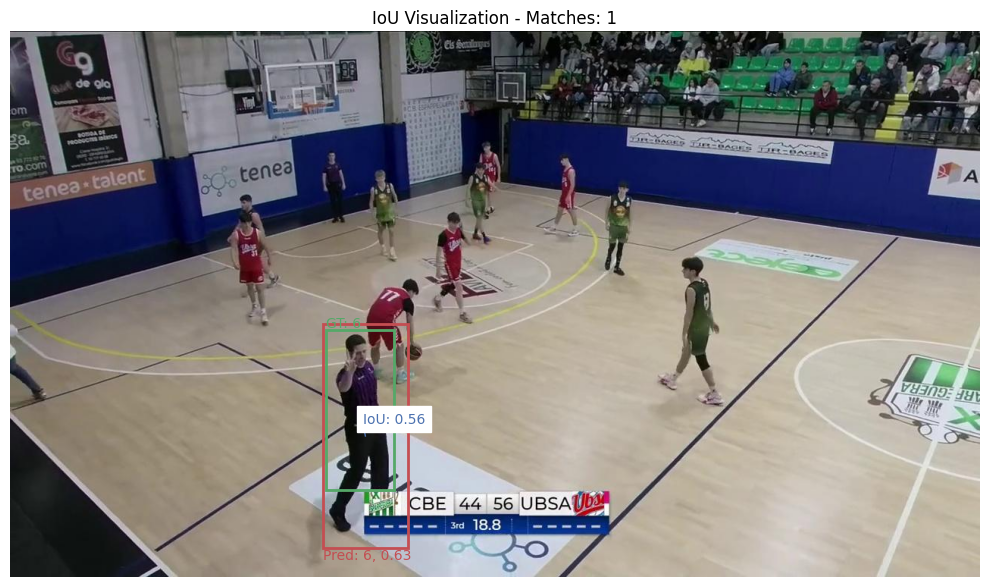


image 1/1 /content/referee-signals-1/valid/images/frame85105_jpg.rf.f325d42bd142333a60d0f4c8cd8df23e.jpg: 384x640 (no detections), 25.3ms
Speed: 2.6ms preprocess, 25.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


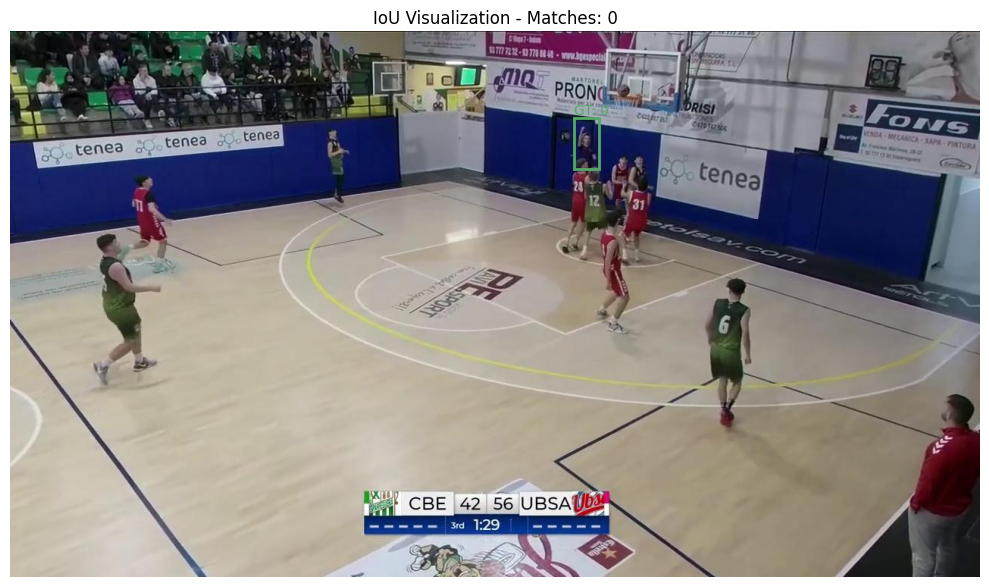


image 1/1 /content/referee-signals-1/valid/images/frame105145_jpg.rf.1f4b65e687a6ec06e29f207c5c92ee33.jpg: 384x640 1 Free_Throw_Without_Rebound, 25.3ms
Speed: 2.6ms preprocess, 25.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/referee-signals-1/valid/images/frame106835_jpg.rf.be73bd2e99c57df5778f89dd47fd412a.jpg: 384x640 1 Free_Throw_With_Rebound, 26.9ms
Speed: 2.3ms preprocess, 26.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/referee-signals-1/valid/images/frame21870_jpg.rf.8c9951e6075f2ef0132d5881e8a030b9.jpg: 384x640 1 Two_Points, 25.2ms
Speed: 4.5ms preprocess, 25.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/referee-signals-1/valid/images/frame130400_jpg.rf.73f678e813739b2bb0a7fd8d11dc594a.jpg: 384x640 (no detections), 26.3ms
Speed: 2.4ms preprocess, 26.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/referee-signa

val: Scanning /content/referee-signals-1/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]


                   all        176        183      0.829      0.674      0.747      0.561
                  Foul         38         40       0.59      0.396      0.464      0.291
       Free_Throw_Made         13         13        0.9      0.692      0.831       0.66
Free_Throw_With_Rebound         38         38          1      0.947      0.974      0.753
Free_Throw_Without_Rebound         24         24          1          1      0.995      0.734
         Substitutions          9          9          1      0.222      0.611      0.456
      Three_Point_Shot         30         35      0.741      0.571       0.66      0.479
       Two_Free_Throws          8          8      0.778      0.875      0.846      0.641
            Two_Points         16         16      0.623      0.688      0.594      0.473
Speed: 3.1ms preprocess, 12.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Saving runs/detect/val6/predictions.json...
Results saved to runs/detect/val6


In [17]:
#run
# Or use already downloaded dataset
results = main_evaluation(
    model_path="/content/best.pt",
    dataset_path="/content/referee-signals-1",
    conf_thres=0.5,
    visualize_count=3
)

#Testing

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("lameess").project("test-data-35u1o")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-data-1 in yolov8:: 100%|██████████| 490/490 [00:00<00:00, 2051.03it/s]


In [9]:
!yolo task=detect mode=val model=/content/best.pt data=/content/test-data-1/data.yaml split=test save=True

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 92 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs
100% 755k/755k [00:00<00:00, 46.1MB/s]
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 38.0±4.4 MB/s, size: 98.5 KB)
val: Scanning /content/test-data-1/test/labels... 242 images, 0 backgrounds, 0 corrupt: 100% 242/242 [00:00<00:00, 354.18it/s]
val: New cache created: /content/test-data-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [05:05<00:00, 19.12s/it]
                   all        242        252      0.867      0.824      0.888       0.65
                  Foul         48         50      0.759       0.68      0.765      0.535
       Free_Throw_Made         11         11      0.736      0.909       0.91      0.659
Free_Throw_With_Rebound         34         34      0.969          1      0.995      0.808
Free_Throw_Without_Rebound         44         

#iou testing

In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics.utils.metrics import box_iou
import torch

def Tcalculate_iou_ultralytics(pred_boxes, gt_boxes):
    pred_boxes = torch.tensor(pred_boxes, dtype=torch.float32)
    gt_boxes = torch.tensor(gt_boxes, dtype=torch.float32)

    # Calculate IoU matrix
    iou_matrix = box_iou(pred_boxes, gt_boxes)
    return iou_matrix

def Tevaluate_single_image_iou(model, image_path, gt_boxes, conf_thres, show=True):
    """
    Calculate IoU for a single image with ground truth boxes

    Args:
        model: YOLO model
        image_path: Path to image
        gt_boxes: List of ground truth boxes in xyxy format [x1, y1, x2, y2, class_id]
        conf_thres: Confidence threshold for detections
        show: Whether to show the visualization

    Returns:
        ious: List of IoU values for matched predictions
        pred_boxes: List of predicted boxes
    """
    # Run prediction
    results = model(image_path, conf=conf_thres)

    # Extract prediction boxes
    pred_boxes_xyxy = []
    pred_boxes_data = []

    for r in results:
      boxes = r.boxes
      for box in boxes.data:
          b = box[:4].cpu().numpy()
          conf = float(box[4])
          cls = int(box[5])

          pred_boxes_xyxy.append(b)
          pred_boxes_data.append({
              'box': b,
              'conf': conf,
              'cls': cls
          })


    # Extract ground truth boxes 
    gt_boxes_xyxy = [box[:4] for box in gt_boxes]
    gt_classes = [int(box[4]) for box in gt_boxes]

    # Calculate IoU matrix
    if pred_boxes_xyxy and gt_boxes_xyxy:
        iou_matrix = calculate_iou_ultralytics(
            np.array(pred_boxes_xyxy),
            np.array(gt_boxes_xyxy)
        ).cpu().numpy()
    else:
        iou_matrix = np.array([])

    # Match predictions to ground truth and get IoUs
    matches = []
    if len(iou_matrix) > 0:
        for gt_idx, gt_class in enumerate(gt_classes):
            best_iou = 0.0
            best_pred_idx = -1

            for pred_idx, pred_data in enumerate(pred_boxes_data):
                # Check if classes match
                if int(pred_data['cls']) == gt_class:
                    iou = iou_matrix[pred_idx, gt_idx]
                    if iou > best_iou:
                        best_iou = iou
                        best_pred_idx = pred_idx

            if best_pred_idx >= 0:
                matches.append({
                    'gt_idx': gt_idx,
                    'pred_idx': best_pred_idx,
                    'iou': best_iou,
                    'gt_class': gt_class,
                    'pred_class': int(pred_boxes_data[best_pred_idx]['cls']),
                    'confidence': pred_boxes_data[best_pred_idx]['conf']
                })

    # Visualize
    if show and len(results) > 0:
        fig, ax = plt.subplots(1, figsize=(10, 10))

        # Show image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)

        # Draw ground truth boxes in green
        for box in gt_boxes:
            x1, y1, x2, y2 = box[:4]
            width = x2 - x1
            height = y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1-5, f"GT: {int(box[4])}", color='g')

        # Draw predicted boxes in red
        for box_data in pred_boxes_data:
            box = box_data['box']
            x1, y1, x2, y2 = box
            width = x2 - x1
            height = y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y2+15, f"Pred: {int(box_data['cls'])}, {box_data['conf']:.2f}", color='r')

        # Draw matches
        for match in matches:
            gt_box = gt_boxes[match['gt_idx']]
            pred_box = pred_boxes_data[match['pred_idx']]['box']

            # Draw line between centers
            gt_center = [(gt_box[0] + gt_box[2])/2, (gt_box[1] + gt_box[3])/2]
            pred_center = [(pred_box[0] + pred_box[2])/2, (pred_box[1] + pred_box[3])/2]

            ax.plot([gt_center[0], pred_center[0]], [gt_center[1], pred_center[1]], 'b-', linewidth=1)
            ax.text((gt_center[0] + pred_center[0])/2, (gt_center[1] + pred_center[1])/2,
                    f"IoU: {match['iou']:.2f}", color='b', backgroundcolor='w')

        ax.set_title(f"IoU Visualization - Matches: {len(matches)}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    return matches, pred_boxes_data

def Tparse_roboflow_annotations(dataset_path, split="test"):
    """
    Returns Dictionary mapping image paths to ground truth boxes
    """
    annotations = {}

    # Get paths
    images_dir = os.path.join(dataset_path, split, "images")
    labels_dir = os.path.join(dataset_path, split, "labels")

    # Get class names from data.yaml
    import yaml
    with open(os.path.join(dataset_path, "data.yaml"), 'r') as f:
        data = yaml.safe_load(f)
        class_names = data.get('names', {})

    # Process each image and label
    for img_file in os.listdir(images_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg')):
            continue

        img_path = os.path.join(images_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(labels_dir, label_file)

        # Check if label file exists
        if not os.path.exists(label_path):
            annotations[img_path] = []
            continue

        # Read image dimensions
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_height, img_width = img.shape[:2]

        # Parse label file (YOLO format: class_id, x_center, y_center, width, height)
        boxes = []
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_center = float(parts[1]) * img_width
                    y_center = float(parts[2]) * img_height
                    width = float(parts[3]) * img_width
                    height = float(parts[4]) * img_height

                    # Convert to xyxy format
                    x1 = x_center - width/2
                    y1 = y_center - height/2
                    x2 = x_center + width/2
                    y2 = y_center + height/2

                    boxes.append([x1, y1, x2, y2, class_id])

        annotations[img_path] = boxes

    return annotations, class_names

def Tcalculate_average_iou(model, annotations, conf_thres=0.25, visualize_count=0):
    all_matches = []
    vis_count = 0

    for img_path, gt_boxes in annotations.items():
        if not gt_boxes:  # Skip images without annotations
            continue

        # Decide whether to visualize this image
        show = vis_count < visualize_count
        if show:
            vis_count += 1

        # Calculate IoU for this image
        matches, _ = Tevaluate_single_image_iou(model, img_path, gt_boxes, conf_thres, show)
        all_matches.extend(matches)

    # Calculate average IoU
    if all_matches:
        avg_iou = sum(m['iou'] for m in all_matches) / len(all_matches)
    else:
        avg_iou = 0.0

    return avg_iou, all_matches

def Tmain_evaluation(model_path, api_key=None, workspace_id=None, project_id=None, version_id=None,
                   dataset_path=None, conf_thres=0.25, visualize_count=5):
    # Load model
    model = YOLO(model_path)

    #dataset_path = '/content/referee-signals-1'

    if not dataset_path:
        raise ValueError("Either dataset_path or Roboflow credentials must be provided")

    # Parse annotations
    annotations, class_names = Tparse_roboflow_annotations(dataset_path)
    print(f"Loaded {len(annotations)} images with annotations. Class names: {class_names}")

    # Calculate IoU for all images
    avg_iou, all_matches = Tcalculate_average_iou(model, annotations, conf_thres, visualize_count)

    print(f"Average IoU: {avg_iou:.4f} over {len(all_matches)} matched objects")

    # Class-wise IoU
    class_ious = {}
    for match in all_matches:
        cls = match['gt_class']
        if cls not in class_ious:
            class_ious[cls] = []
        class_ious[cls].append(match['iou'])

    print("\nClass-wise IoU:")
    for cls, ious in class_ious.items():
        cls_name = class_names[cls] if cls < len(class_names) else f"Class {cls}"
        avg_cls_iou = sum(ious) / len(ious)
        print(f"  {cls_name}: {avg_cls_iou:.4f} ({len(ious)} objects)")

    # Return all results
    return {
        'custom_avg_iou': avg_iou,
        'custom_matches': all_matches,
        'class_ious': class_ious,
        'ultralytics_results': results
    }

Loaded 242 images with annotations. Class names: ['Foul', 'Free_Throw_Made', 'Free_Throw_With_Rebound', 'Free_Throw_Without_Rebound', 'Substitutions', 'Three_Point_Shot', 'Two_Free_Throws', 'Two_Points']

image 1/1 /content/test-data-1/test/images/frame93460_jpg.rf.01acca969122bffd3106491eb572927f.jpg: 384x640 1 Free_Throw_Without_Rebound, 953.3ms
Speed: 3.4ms preprocess, 953.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


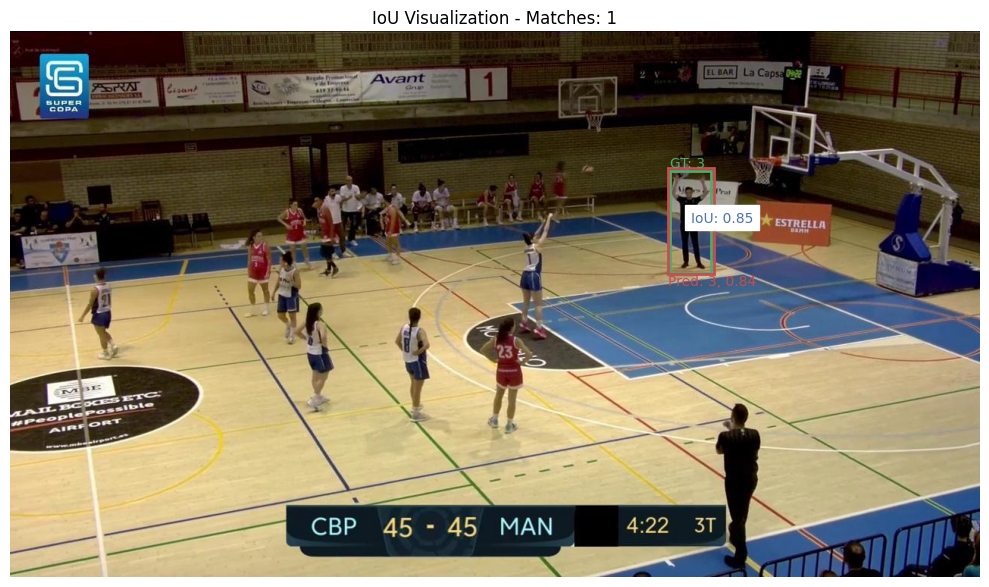


image 1/1 /content/test-data-1/test/images/frame31770_jpg.rf.f4f810d362e7325a57c03cf9585015c5.jpg: 384x640 1 Three_Point_Shot, 991.7ms
Speed: 3.8ms preprocess, 991.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


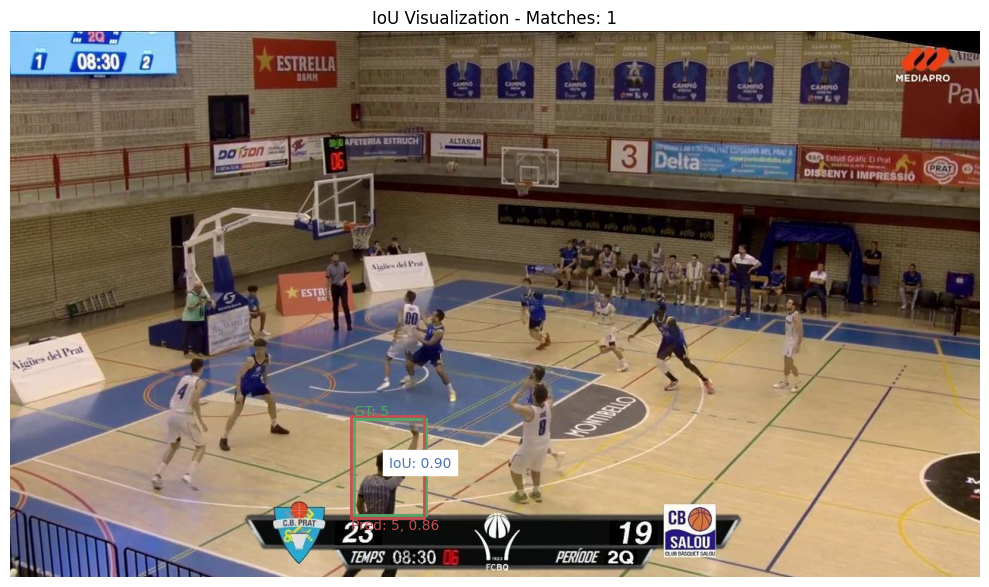


image 1/1 /content/test-data-1/test/images/frame53300_jpg.rf.b58b97207311f708bcdada3b6be0c97d.jpg: 384x640 1 Foul, 1 Two_Points, 995.4ms
Speed: 4.0ms preprocess, 995.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


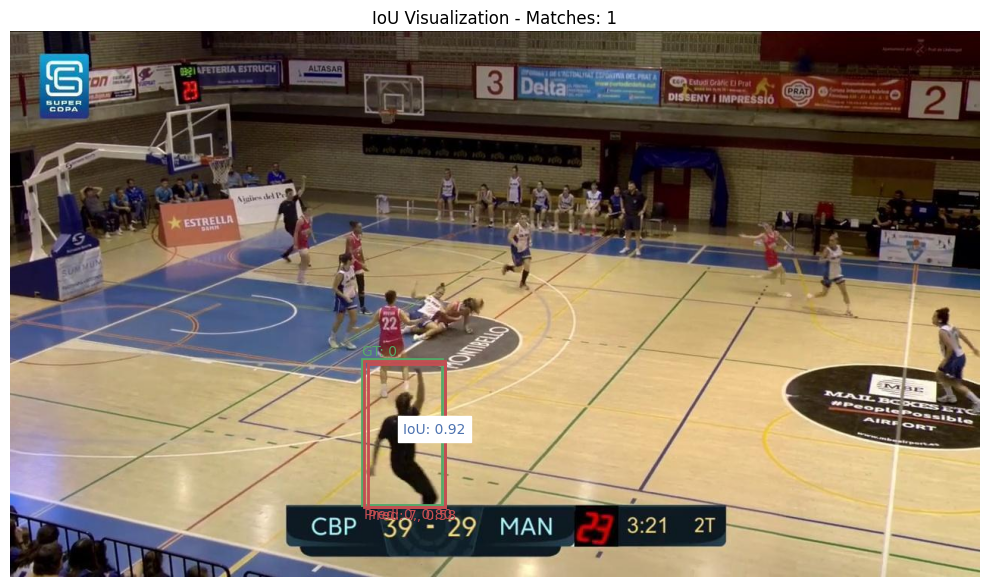


image 1/1 /content/test-data-1/test/images/frame98650_jpg.rf.1266a7e1493011b0049159baee3d5154.jpg: 384x640 1 Three_Point_Shot, 1010.9ms
Speed: 4.3ms preprocess, 1010.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/test-data-1/test/images/frame130020_jpg.rf.69a860891268933046403bfdd23b6d82.jpg: 384x640 (no detections), 981.7ms
Speed: 3.2ms preprocess, 981.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/test-data-1/test/images/frame126125_jpg.rf.9488861b4d70f73eaefcc33925c8b830.jpg: 384x640 1 Foul, 981.6ms
Speed: 3.3ms preprocess, 981.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/test-data-1/test/images/frame126580_jpg.rf.f38305b47e2c0412a222f6f8135b1361.jpg: 384x640 1 Free_Throw_Without_Rebound, 1088.8ms
Speed: 3.2ms preprocess, 1088.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/test-data-1/test/images/frame5080_jpg.rf.b

In [20]:
#run
results = Tmain_evaluation(
    model_path="/content/best.pt",
    dataset_path="/content/test-data-1",
    conf_thres=0.5,
    visualize_count=3
)

#Make the model predict on test set images

In [21]:
!yolo task=detect mode=predict model=/content/best.pt source=/content/test-data-1/test/images

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 92 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs

image 1/242 /content/test-data-1/test/images/frame101800_jpg.rf.a33ff79105ed58ac8f4de4ba8af75d9c.jpg: 384x640 1 Two_Free_Throws, 1008.7ms
image 2/242 /content/test-data-1/test/images/frame101990_jpg.rf.1ad4db5838356f898f0fa323431b6cfc.jpg: 384x640 1 Free_Throw_Without_Rebound, 1000.8ms
image 3/242 /content/test-data-1/test/images/frame102240_jpg.rf.2d0a69c4a02c8055419c1a4392a33c5c.jpg: 384x640 1 Three_Point_Shot, 1473.1ms
image 4/242 /content/test-data-1/test/images/frame102245_jpg.rf.4d0f61f6d419294a2e719c075078825f.jpg: 384x640 1 Free_Throw_Without_Rebound, 1891.4ms
image 5/242 /content/test-data-1/test/images/frame102435_jpg.rf.ca0459bbd2328e6f3f2990ffb4a5303f.jpg: 384x640 1 Substitutions, 1226.3ms
image 6/242 /content/test-data-1/test/images/frame102445_jpg.rf.9ef2c1627f7a04758bf92f7999ee6ce8.jpg: 384x640 1 Substitutions,